<ipython-input-25-0fc5117b298d>:42: RuntimeWarning: divide by zero encountered in true_divide
  DF_exp =         (O_exp)/np.array([sum([exp[:,0,1,:,x,i] for i in [4,5]]) for x in range(len(cf.q))])
<ipython-input-25-0fc5117b298d>:43: RuntimeWarning: divide by zero encountered in true_divide
  DF_sw =          (O_sw)/np.array([sum([sw[:,0,1,:,x,i] for i in [4,5]]) for x in range(len(cf.q))])
<ipython-input-25-0fc5117b298d>:44: RuntimeWarning: divide by zero encountered in true_divide
  DF_lockdown =    (O_lockdown)/np.array([sum([lockdown[:,0,0,:,x,i] for i in [4,5]]) for x in range(len(cf.q))])
<ipython-input-25-0fc5117b298d>:45: RuntimeWarning: divide by zero encountered in true_divide
  DF_no_lockdown = (O_no_lockdown)/np.array([sum([no_lockdown[:,0,0,:,x,i] for i in [4,5]]) for x in range(len(cf.q))])


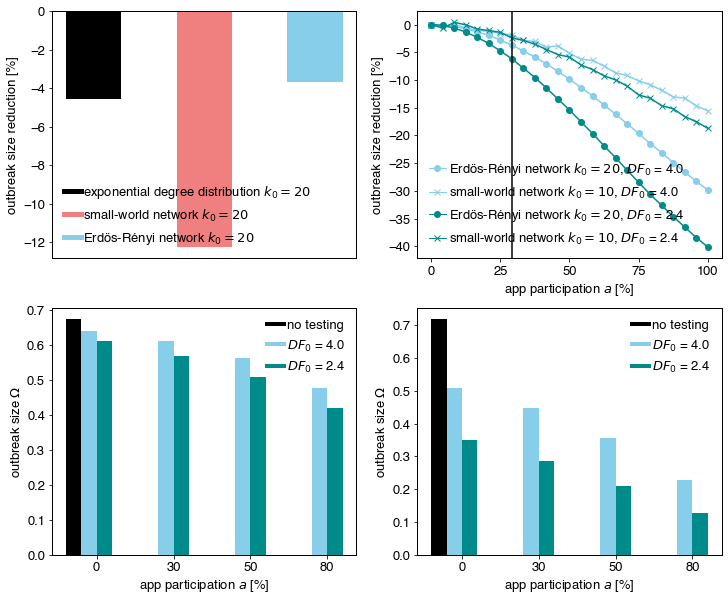

In [25]:
import pickle
import matplotlib.pyplot as plt

hfont = {'fontname':'Helvetica'}
plt.rcParams.update({'font.size': 13})
import numpy as np
from matplotlib.lines import Line2D
import gzip
import qsuite_config as cf
sw = pickle.load(gzip.open('/Users/angeliqueburdinski/expotracing/_qsuite/tracing_sim/results_sw_NMEAS_100_ONLYSAVETIME_False/results.p.gz','rb'))
sw = np.array(sw)
exp = pickle.load(gzip.open('/Users/angeliqueburdinski/expotracing/_qsuite/tracing_sim/results_exp_NMEAS_100_ONLYSAVETIME_False/results.p.gz','rb'))
exp = np.array(exp)
sw_noQ = pickle.load(gzip.open('/Users/angeliqueburdinski/expotracing/_qsuite/tracing_sim/results_sw_noQ_NMEAS_100_ONLYSAVETIME_False/results.p.gz','rb'))
sw_noQ = np.array(sw_noQ)
exp_noQ = pickle.load(gzip.open('/Users/angeliqueburdinski/expotracing/_qsuite/tracing_sim/results_exp_noQ_NMEAS_100_ONLYSAVETIME_False/results.p.gz','rb'))
exp_noQ = np.array(exp_noQ)
lockdown = pickle.load(gzip.open('/Users/angeliqueburdinski/expotracing/_qsuite/tracing_sim/results_lockdown_NMEAS_100_ONLYSAVETIME_False/results.p.gz','rb'))
lockdown = np.array(lockdown)
no_lockdown = pickle.load(gzip.open('/Users/angeliqueburdinski/expotracing/_qsuite/tracing_sim/results_nolockdown_NMEAS_100_ONLYSAVETIME_False/results.p.gz','rb'))
no_lockdown = np.array(no_lockdown)
marker = ['o','v','x','d','p','<']
colors = [
        'k',
        'lightcoral',
        'skyblue',
        'indianred',
        'darkcyan',
        'maroon',
        'darkgoldenrod',
        'navy',
        'mediumvioletred',
        'darkseagreen',
        'crimson'
        ]
def Figure():
    O_exp =         [sum([exp[:,0,1,:,x,i] for i in [2,3,4,5,6]]) for x in range(len(cf.q))]
    O_sw =          [sum([sw[:,0,1,:,x,i] for i in [2,3,4,5,6]]) for x in range(len(cf.q))]
    O_lockdown =    [sum([lockdown[:,0,0,:,x,i] for i in [2,3,4,5,6]]) for x in range(len(cf.q))]
    O_no_lockdown = [sum([no_lockdown[:,0,0,:,x,i] for i in [2,3,4,5,6]]) for x in range(len(cf.q))]
    
    DF_exp =         (O_exp)/np.array([sum([exp[:,0,1,:,x,i] for i in [4,5]]) for x in range(len(cf.q))])
    DF_sw =          (O_sw)/np.array([sum([sw[:,0,1,:,x,i] for i in [4,5]]) for x in range(len(cf.q))])
    DF_lockdown =    (O_lockdown)/np.array([sum([lockdown[:,0,0,:,x,i] for i in [4,5]]) for x in range(len(cf.q))])
    DF_no_lockdown = (O_no_lockdown)/np.array([sum([no_lockdown[:,0,0,:,x,i] for i in [4,5]]) for x in range(len(cf.q))])
    
    mean_O_exp =         np.mean(O_exp,axis = 1)/200_000
    mean_O_sw =          np.mean(O_sw,axis = 1)/200_000
    mean_O_lockdown =    np.mean(O_lockdown,axis = 1)/200_000
    mean_O_no_lockdown = np.mean(O_no_lockdown,axis = 1)/200_000
    
    mean_DF_exp =         np.mean(DF_exp,axis = 1)
    mean_DF_sw =          np.mean(DF_sw,axis = 1)
    mean_DF_lockdown =    np.mean(DF_lockdown,axis = 1)
    mean_DF_no_lockdown = np.mean(DF_no_lockdown,axis = 1)

    red_exp =        [(((mean_O_exp[x]/mean_O_exp[x][0])-1)*100) for x in range(6)]
    red_sw =         [(((mean_O_sw[x]/mean_O_sw[x][0])-1)*100) for x in range(6)]
    red_lock =       [(((mean_O_lockdown[x]/mean_O_lockdown[x][0])-1)*100) for x in range(6)]
    red_nolock =     [(((mean_O_no_lockdown[x]/mean_O_no_lockdown[x][0])-1)*100) for x in range(6)]
    
    fig,ax = plt.subplots(2,2, figsize = (12,10))
    lines00 = [Line2D([0], [0],color = colors[x], linewidth=5, linestyle='-') for x in range(3)]
    labels00 = ['exponential degree distribution $k_0 = 20$ ','small-world network $k_0 = 20$', 'Erdös-Rényi network $k_0 = 20$']
    
    ax[0,0].bar(0,red_exp[2][7],       color = colors[0], width = 0.5)
    ax[0,0].bar(1,red_sw[2][7],        color = colors[1], width = 0.5)
    ax[0,0].bar(2,red_nolock[2][7],    color = colors[2], width = 0.5)
    ax[0,0].set_xticks([])
    ax[0,0].legend(lines00,labels00)
    ax[0,0].set_ylabel('outbreak size reduction [%]')
    
    a = [0,7,12,19]
    positions01 = (0.1, 1.1, 2.1, 3.1)
    xlabels01 = ("0", "30", "50", "80")
    lines01 = [Line2D([0], [0], color = colors[x],linewidth=4, linestyle='-') for x in [0,2,4]]
    ylabels_exp = ['no testing']+[r'$DF_0$ = '+str(round(mean_DF_exp[x][0],1)) for x in [2,3]]
    ylabels_sw = ['no testing']+[r'$DF_0$ = '+str(round(mean_DF_sw[x][0],1)) for x in [2,3]]
    for x in a:
        ax[1,0].bar(0-0.2,          mean_O_exp[0][0], alpha = 1, color = colors[0], lw = 1.5, width = 0.2)
        ax[1,0].bar(a.index(x),     mean_O_exp[2][x], alpha = 1, color = colors[2], lw = 1.5, width = 0.2)
        ax[1,0].bar(a.index(x)+0.2, mean_O_exp[3][x], alpha = 1, color = colors[4], lw = 1.5, width = 0.2)
        ax[1,1].bar(0-0.2,          mean_O_sw[0][0],  alpha = 1, color = colors[0], lw = 1.5, width = 0.2)
        ax[1,1].bar(a.index(x),     mean_O_sw[2][x],  alpha = 1, color = colors[2], lw = 1.5, width = 0.2)
        ax[1,1].bar(a.index(x)+0.2, mean_O_sw[3][x],  alpha = 1, color = colors[4], lw = 1.5, width = 0.2)
    for i in [0,1]:    
        ax[1,i].set_xticks(positions01)
        ax[1,i].set_xticklabels(xlabels01)
        ax[1,i].set_xlabel(r'app participation $a$ [%]',**hfont)
        ax[1,i].set_ylabel(r'outbreak size $\Omega$ ',**hfont)
    ax[1,0].legend(lines01, ylabels_exp)
    ax[1,1].legend(lines01, ylabels_sw)
    
    positions11 = (0, 6, 12, 18,24)
    xlabels11 = ("0", "25", "50", "75", '100')
    lines11 = [Line2D([0], [0], color = colors[2], marker = 'o', alpha = 1, linewidth=1, linestyle='-'),
             Line2D([0], [0], color = colors[2], marker = 'x', alpha = 1, linewidth=1, linestyle='-'),
             Line2D([0], [0], color = colors[4], marker = 'o', alpha = 1, linewidth=1, linestyle='-'),
             Line2D([0], [0], color = colors[4], marker = 'x', alpha = 1, linewidth=1, linestyle='-')]
    ylabels11 = ['Erdös-Rényi network $k_0 = 20$, $DF_0$ = '+str(round(mean_DF_no_lockdown[2][0],1)),
                 'small-world network $k_0 = 10$, $DF_0$ = '+str(round(mean_DF_lockdown[2][0],1)),
                 'Erdös-Rényi network $k_0 = 20$, $DF_0$ = '+str(round(mean_DF_no_lockdown[3][0],1)),
                 'small-world network $k_0 = 10$, $DF_0$ = '+str(round(mean_DF_lockdown[3][0],1))]
           
        
    ax[0,1].plot(((mean_O_no_lockdown[2]/mean_O_no_lockdown[2][0])-1)*100,  alpha = 1, color = colors[2],marker = 'o')
    ax[0,1].plot(((mean_O_lockdown[2]/mean_O_lockdown[2][0])-1)*100,        alpha = 1, color = colors[2], marker = 'x')
    ax[0,1].plot(((mean_O_no_lockdown[3]/mean_O_no_lockdown[3][0])-1)*100,  alpha = 1, color = colors[4],marker = 'o')
    ax[0,1].plot(((mean_O_lockdown[3]/mean_O_lockdown[3][0])-1)*100,        alpha = 1, color = colors[4], marker = 'x')
    ax[0,1].axvline(7,color = 'k')
    ax[0,1].set_xticks(positions11)
    ax[0,1].set_xticklabels(xlabels11)
    ax[0,1].set_xlabel(r'app participation $a$ [%]',**hfont)
    ax[0,1].set_ylabel(r'outbreak size reduction [%]',**hfont)
    ax[0,1].legend(lines11, ylabels11)
    
    plt.savefig('figure.png',dpi=300)
    plt.show()



Figure()